## 1. Import & load libraries

In [1]:
%pip cache purge

%pip install mne
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-learn


Files removed: 0 (0 bytes)
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list


Package            Version
------------------ -----------
asttokens          3.0.0
certifi            2025.1.31
charset-normalizer 3.4.1
colorama           0.4.4
comm               0.2.2
contourpy          1.3.1
cycler             0.12.1
debugpy            1.8.12
decorator          5.1.1
exceptiongroup     1.2.2
executing          2.1.0
fonttools          4.56.0
idna               3.10
importlib_metadata 8.6.1
ipykernel          6.29.5
ipython            8.32.0
jedi               0.19.2
Jinja2             3.1.5
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.8
lazy_loader        0.4
MarkupSafe         3.0.2
matplotlib         3.9.4
matplotlib-inline  0.1.7
mne                1.9.0
nest_asyncio       1.6.0
numpy              2.0.2
packaging          24.2
pandas             2.2.3
parso              0.8.4
pexpect            4.9.0
pickleshare        0.7.5
pillow             11.1.0
pip                25.0
platformdirs       4.3.6
pooch      

In [32]:
import mne
from mne.datasets import eegbci
from mne.io import read_raw_edf
from mne.io import concatenate_raws
# from mne.preprocessing import ICA
from mne.time_frequency import EpochsTFR

# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from io import BytesIO
# from PIL import Image

import os
import sys
import re
import warnings
import glob
import logging
import json
from datetime import datetime

import pickle

from typing import List, Tuple, Dict, Optional

sys.path.append(os.path.abspath(".."))
from utils.load_data import load_data
from utils.summarize_edf_files import summarize_edf_files
# from utils.pca import analyze_eeg_pca


In [4]:
print("MNE version:", mne.__version__)


MNE version: 1.9.0


In [5]:
warnings.filterwarnings("ignore", message="FigureCanvasAgg is non-interactive, and thus cannot be shown")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Channel locations not available.*")


## 2. Info

### Experimental Protocol

[Link of dataset](https://physionet.org/content/eegmmidb/1.0.0/)

This data set consists of over 1500 one- and two-minute EEG recordings, obtained from ***109 volunteers***, as described below.

Subjects performed different motor/imagery tasks while 64-channel EEG were recorded using the BCI2000 system (http://www.bci2000.org). Each subject performed ***14 experimental runs***: two one-minute baseline runs (one with eyes open, one with eyes closed), and three two-minute runs of each of the four following tasks:

- **TASK 1**: A target appears on either the left or the right side of the screen. The subject opens and closes the corresponding fist until the target disappears. Then the subject relaxes.
- **TASK 2**: A target appears on either the left or the right side of the screen. The subject imagines opening and closing the corresponding fist until the target disappears. Then the subject relaxes.
- **TASK 3**: A target appears on either the top or the bottom of the screen. The subject opens and closes either both fists (if the target is on top) or both feet (if the target is on the bottom) until the target disappears. Then the subject relaxes.
- **TASK 4**: A target appears on either the top or the bottom of the screen. The subject imagines opening and closing either both fists (if the target is on top) or both feet (if the target is on the bottom) until the target disappears. Then the subject relaxes.

### Description of data:

The experimental runs were:

- Baseline, eyes open
- Baseline, eyes closed
- Task 1 (open and close left or right fist)
- Task 2 (imagine opening and closing left or right fist)
- Task 3 (open and close both fists or both feet)
- Task 4 (imagine opening and closing both fists or both feet)

Each annotation includes one of three codes (T0, T1, or T2):

- **T0** corresponds to rest
- **T1** corresponds to onset of motion (real or imagined) of
        the left fist (in runs 3, 4, 7, 8, 11, and 12)
        both fists (in runs 5, 6, 9, 10, 13, and 14)
- **T2** corresponds to onset of motion (real or imagined) of
        the right fist (in runs 3, 4, 7, 8, 11, and 12)
        both feet (in runs 5, 6, 9, 10, 13, and 14)

| Run       | Task                                |
|-----------|-------------------------------------|
| 1         | Baseline, eyes open                 |
| 2         | Baseline, eyes closed               |
| 3, 7, 11  | Motor execution: left vs right hand |
| 4, 8, 12  | Motor imagery: left vs right hand   |
| 5, 9, 13  | Motor execution: hands vs feet      |
| 6, 10, 14 | Motor imagery: hands vs feet        |


The EEGs were recorded from 64 electrodes as per the international system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10)

<img width=100% src=../images/EGG_64.png>

<img width=100% src=../images/64_channel_sharbrough.png>


## 3. Load data

In [6]:
subjects = [1] # subjects to load (from 1 to 109 volunteers)

runs = [3]  # experimental runs for each subject
# runs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

raw_data = load_data(subjects, runs)

if raw_data:
    print(f"\n✅ Data successfully loaded into: \n   📂 {os.path.abspath('../data/raw/files/')}")



=== Loading data from_volunteer 1 ===
Extracting EDF parameters from /home/dgerwig-/OneDrive/_code_42/42_Cursus_Outer_Core/vortex/42_vortex/data/raw/files/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...

✅ Data successfully loaded into: 
   📂 /home/dgerwig-/OneDrive/_code_42/42_Cursus_Outer_Core/vortex/42_vortex/data/raw/files


In [7]:
print(raw_data)


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>


Using matplotlib as 2D backend.


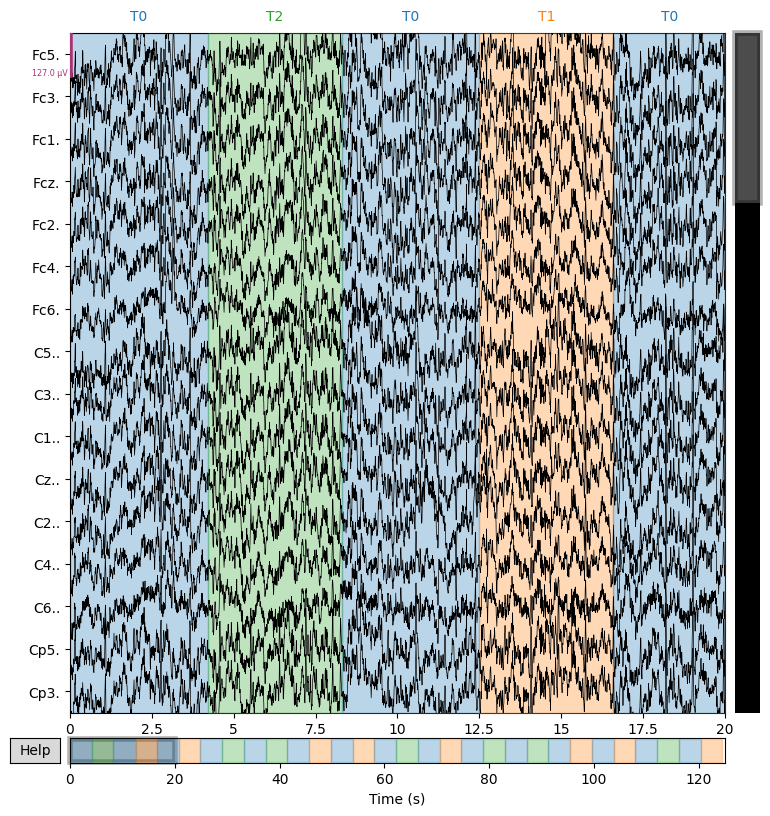

In [8]:
raw_data.plot(duration=20, n_channels=16, scalings='auto');


In [9]:
summarize_edf_files()


No EDF files found in the directory or subdirectories.


In [10]:
raw_data.info?


Type:        Info
String form:
<Info | 9 non-empty values
           bads: []
           ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C <...>  64
           projs: []
           sfreq: 160.0 Hz
           subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
           >
Length:      36
File:        /sgoinfre/students/dgerwig-/miniforge/envs/vortex_env/lib/python3.11/site-packages/mne/_fiff/meas_info.py
Docstring:  
Measurement information.

This data structure behaves like a dictionary. It contains all metadata
that is available for a recording. However, its keys are restricted to
those provided by the
`FIF format specification <https://github.com/mne-tools/fiff-constants>`__,
so new entries should not be manually added.

.. note::
    This class should not be instantiated directly via
    ``mne.Info(...)``. Instead, use :func:`mne.create_info` to create
    measurement information from scratch.

.. warning::
    The only entries that should be manually changed b

In [11]:
print(raw_data)
print(raw_data.info)
print(raw_data.annotations)
print(raw_data.annotations.description)
print(raw_data.annotations.onset)
print(raw_data.info['ch_names'])


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>
<Info | 9 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>
['T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1'
 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2'
 'T0' 'T1']
[  0.    4.2   8.3  12.5  16.6  20.8  24.9  29.1  33.2  37.4  41.5  45.7
  49.8  54.   58.1  62.3  66.4  70.6  74.7  78.9  83.   87.2  91.3  95.5
  99.6 103.8 107.9 112.1 116.2 120.4]
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 

In [12]:
eegbci.standardize(raw_data)  # Standardize channel names
print(raw_data.info)
print(raw_data.info['ch_names'])


<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


In [13]:
montage = mne.channels.make_standard_montage('standard_1005')
raw_data.set_montage(montage)


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

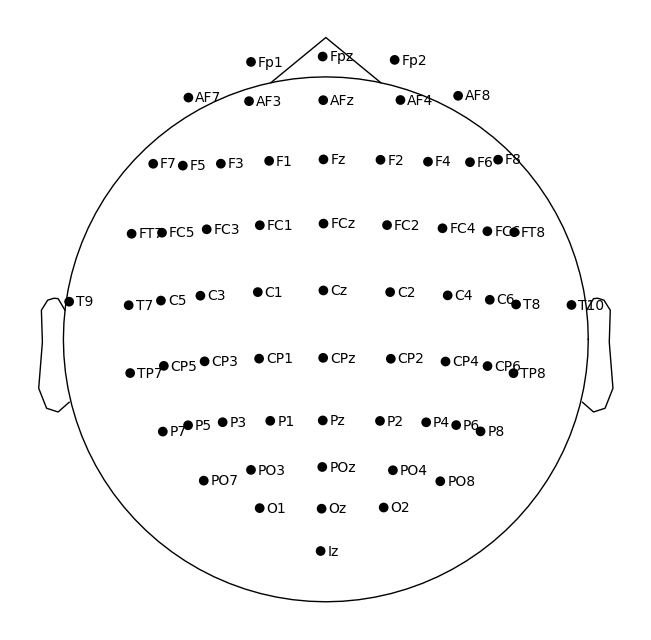

In [14]:
raw_data.plot_sensors(show_names=True);


## 4. Signal filtering

A Notch Filter (also called a Band-stop filter) is used to remove specific unwanted frequencies from a signal, particularly when a narrow frequency band causes interference or noise. In signal processing, the "notch" refers to the removal of frequencies within a small range, leaving the other frequencies untouched.

**How It Works:**

- Passband and Stopband:

	- The passband is the range of frequencies that the filter allows to pass through without attenuation.
	- The stopband is the range of frequencies that the filter suppresses.
	- A notch filter specifically targets and reduces a narrow band of frequencies (the notch), while passing frequencies outside of that band.

- Frequency Range:

	- The notch filter is designed to attenuate a specific frequency (or a small range of frequencies) while allowing the other frequencies to pass through. This is particularly useful when dealing with known interference frequencies, such as the power line frequency (50 Hz or 60 Hz) that can appear in many electrical signals.

**Applications of Notch Filters:** 
- Power line interference: In electrical signals, the 50 Hz or 60 Hz power line frequency is a common source of noise. The notch filter is used to remove this frequency without affecting the rest of the signal.
- Electroencephalography (EEG): In EEG data, notch filters are commonly applied to remove noise caused by electrical equipment, such as power line interference.
- Audio processing: It can also be used to remove hum or buzz noises caused by equipment, such as electrical hum from a microphone or speakers.
- Communication systems: To filter out specific unwanted frequencies or interference.

📡 EEG Frequency Bands and Their Importance

Brain activity is divided into different frequency bands:  

| **Band**  | **Frequency (Hz)** | **Function** |
|-----------|-------------------|-------------|
| **Delta** | 0.5 - 4 Hz  | Deep sleep, unconscious states |
| **Theta** | 4 - 8 Hz    | Deep relaxation, meditation |
| **Alpha** | 8 - 12 Hz   | Calm wakefulness, relaxation |
| **Beta**  | 12 - 30 Hz  | Active thinking, problem-solving |
| **Gamma** | >30 Hz      | Cognitive processing, perception |

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 265 samples (1.656 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


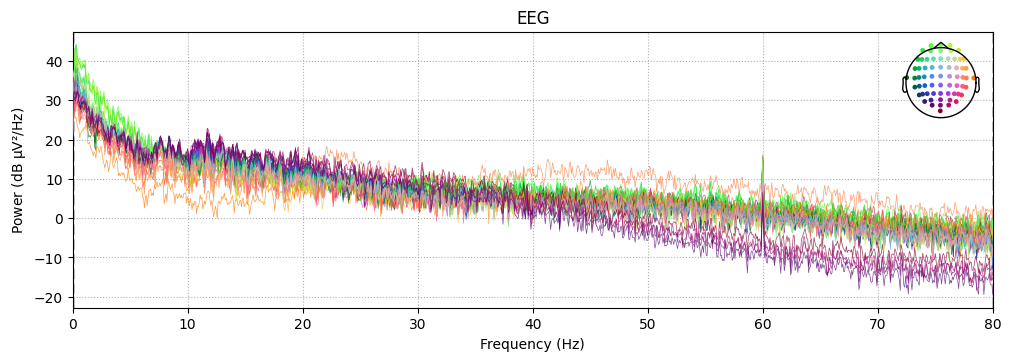

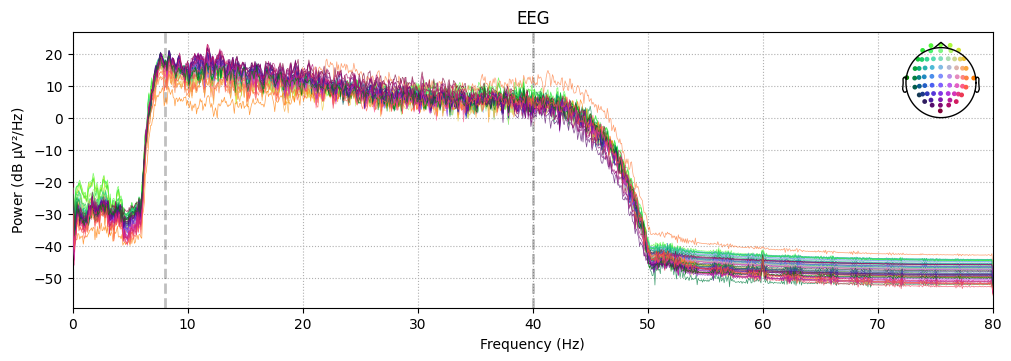

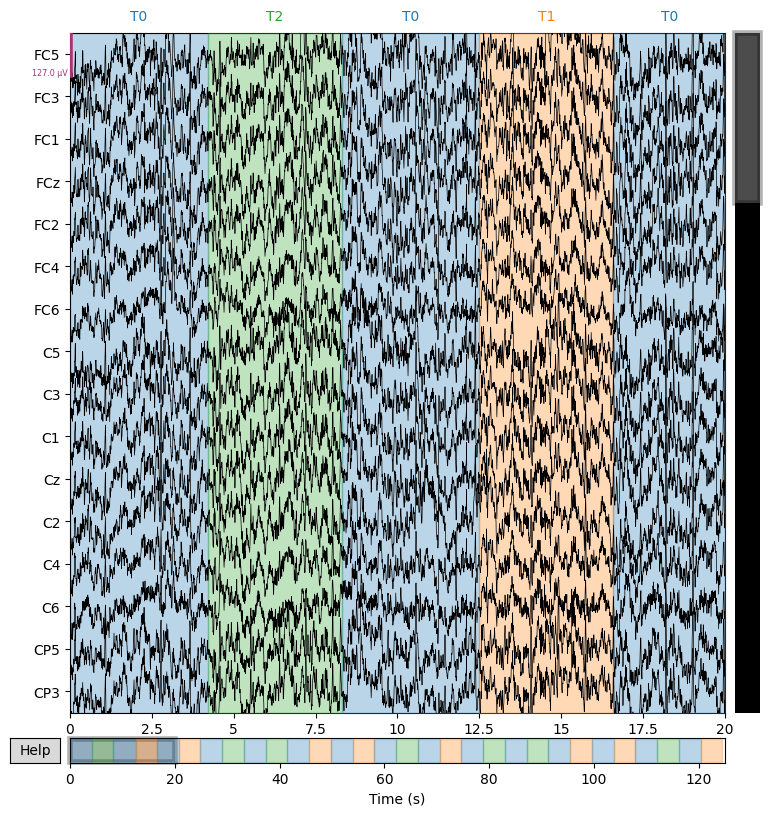

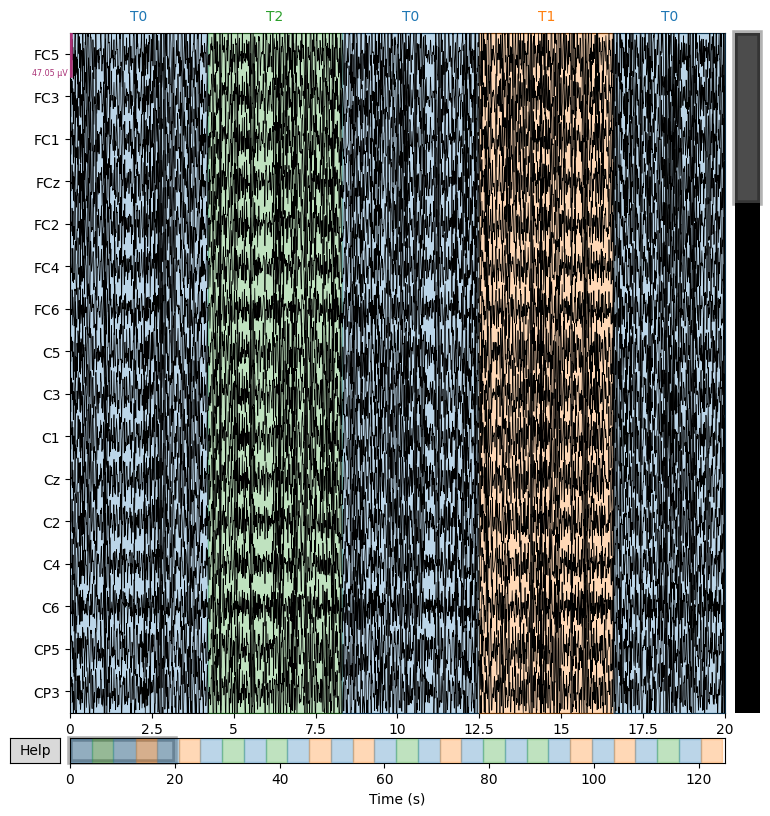

In [15]:
filter_data = raw_data.copy()

# Apply bandpass filter (between 8 and 40 Hz for motor imagery)
low_cutoff = 8
high_cutoff = 40
filter_data.filter(low_cutoff, high_cutoff, fir_design='firwin')

# Remove power line noise (50Hz in Europe, 60Hz in America)
# filter_data.notch_filter(freqs=[60], fir_design='firwin')

# Visualize before & after filtering
raw_data.plot_psd(fmax=80)
filter_data.plot_psd(fmax=80)
raw_data.plot(duration=20, n_channels=16, scalings='auto');
filter_data.plot(duration=20, n_channels=16, scalings='auto');


## 5. Event extraction

In [16]:
# Show the events
events, event_id = mne.events_from_annotations(filter_data)
print(event_id)
print(events)


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]


In [17]:
# Replace the event_id keys with more meaningful names
event_id = {
    'rest' if k == np.str_('T0') else 
    'hands' if k == np.str_('T1') else 
    'feets': v 
    for k, v in event_id.items()
}
print(event_id)
print(events)


{'rest': 1, 'hands': 2, 'feets': 3}
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]


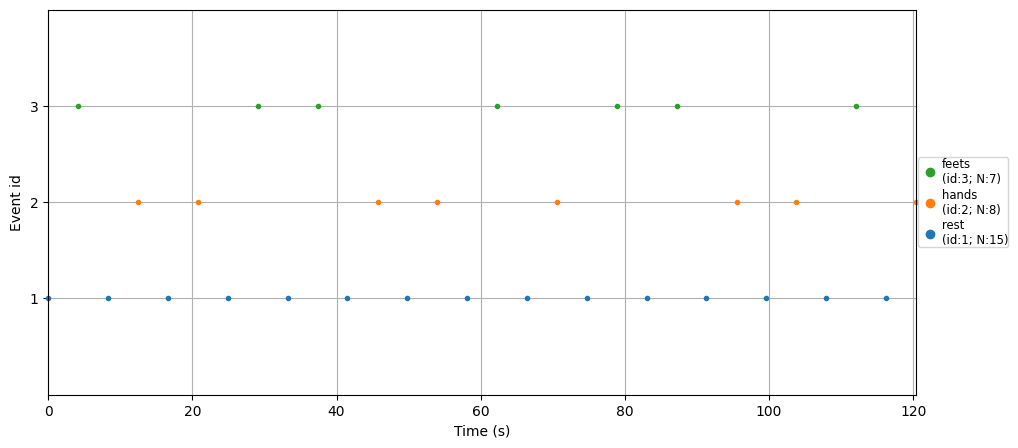

In [18]:
plt.rcParams["figure.figsize"] = (14, 5)
mne.viz.plot_events(events, sfreq=raw_data.info['sfreq'], 
                     first_samp=raw_data.first_samp, event_id=event_id)
plt.show()


## 6. Feature extraction using spectral analysis (Calculate spectral power using WAVELETS)

Time-frequency analysis using wavelets is crucial in EEG signal processing because it provides information about both when and at what frequency the brain activity occurs. Unlike traditional Fourier transforms that only show frequency content, wavelets maintain temporal information, making them ideal for analyzing dynamic brain signals.

***What are Wavelets?***

Wavelets are wave-like oscillations that are localized in time, making them excellent tools for analyzing non-stationary signals like EEG. The ***Morlet wavelet*** (https://en.wikipedia.org/wiki/Morlet_wavelet) , used in this analysis, is particularly suitable for EEG analysis because:

- It provides a good balance between time and frequency resolution
- Its shape is similar to naturally occurring brain oscillations
- It can detect brief oscillatory changes in the signal

***Frequency Bands of Interest***

The analysis focuses on two key frequency bands:

- **Alpha Band (8-13 Hz):**

	- Associated with motor coordination
	- Typically shows power decrease during motor imagery
	- Strong in sensorimotor areas
	- Key indicator of motor planning


- **Beta Band (13-30 Hz):**

	- Related to motor planning and execution
	- Shows characteristic patterns during motor imagery
	- Important for motor control
	- Exhibits event-related desynchronization during movement



Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 801 original time points ...
0 bad epochs dropped


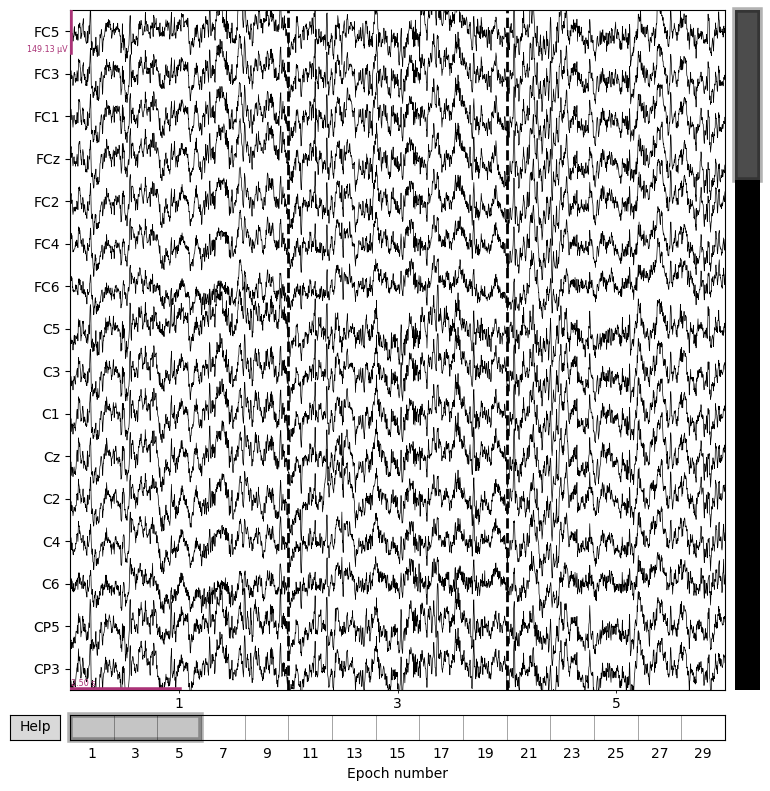

In [19]:
# Define epoch parameters
tmin, tmax = -1.0, 4.0  # Capture 1s before and 4s after event

# Create epochs for different tasks
epochs = mne.Epochs(
    raw_data,                        # Filtered EEG data
    events,                          # Event timing array
    event_id=dict(left=2, right=3),  # Event type mapping
    tmin=tmin, 
    tmax=tmax,
    baseline=(None, 0),              # Baseline period
    preload=True
)

# Visualize epochs
epochs.plot(n_channels=16, scalings='auto', n_epochs=3, title='Epochs');


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying baseline correction (mode: percent)


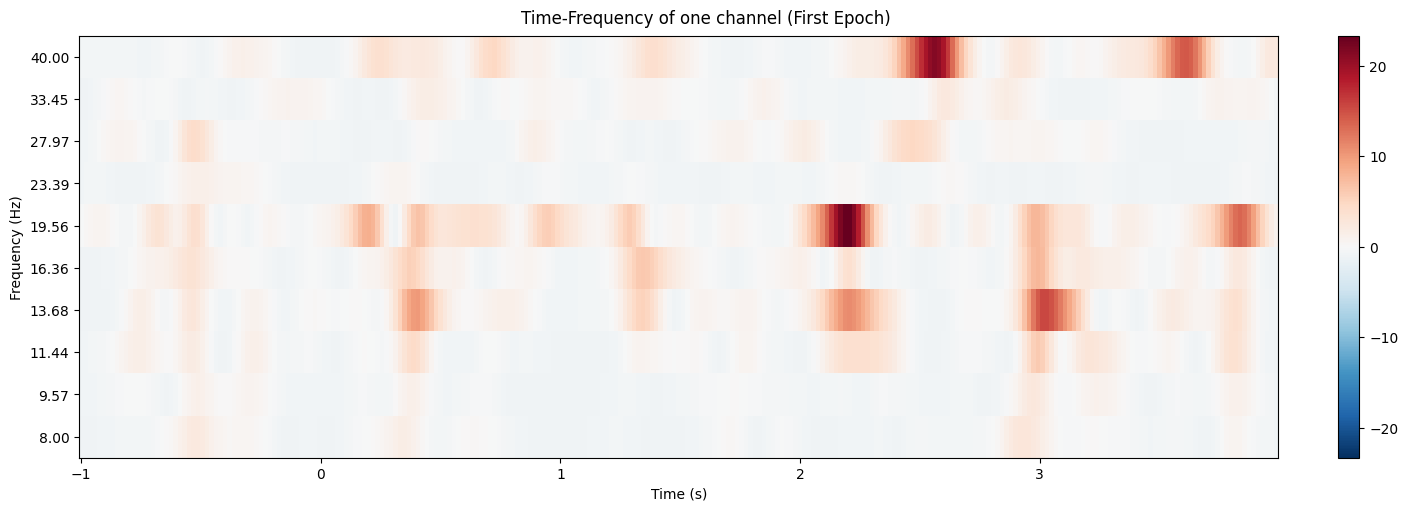

Applying baseline correction (mode: percent)


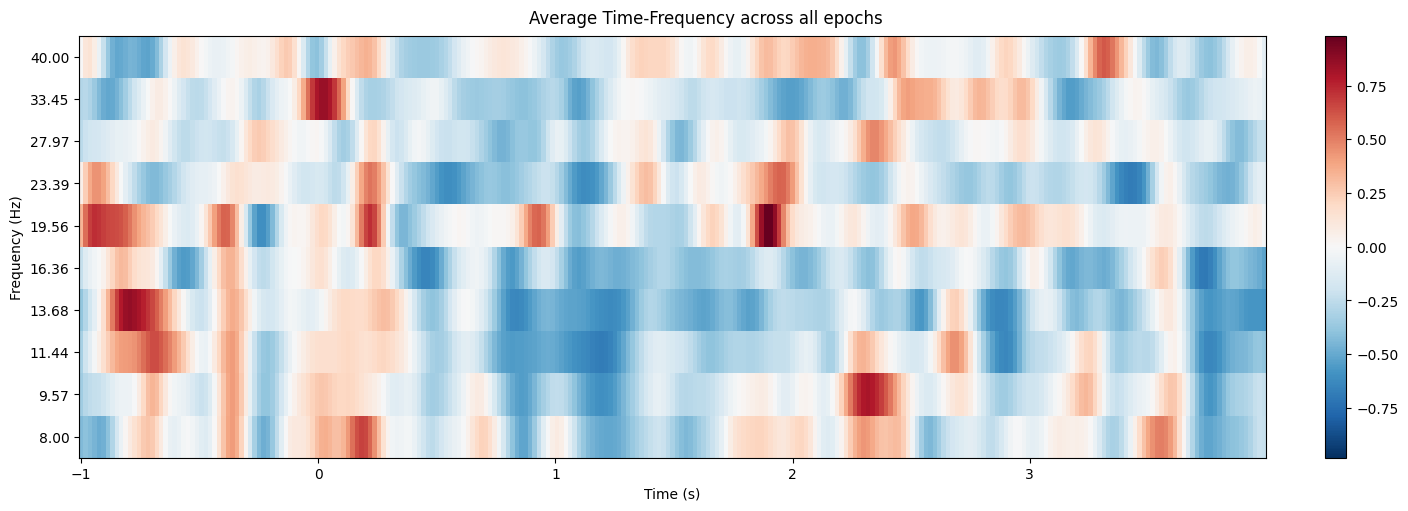

[<Figure size 1400x500 with 2 Axes>]

In [20]:
# Define frequency parameters
freqs = np.logspace(*np.log10([low_cutoff, high_cutoff]), num=10)  # Logarithmic frequency spacing
n_cycles = freqs / 2  # Number of cycles for each frequency

# Compute time-frequency representation using Morlet wavelets
tfr = epochs.compute_tfr(
    method='morlet',         # Morlet wavelet transform
    freqs=freqs,             # Frequency range
    n_cycles=n_cycles,       # Cycles per frequency
    use_fft=True,            # Use Fast Fourier Transform
    decim=3,                 # Decimation factor
    return_itc=False         # Don't return inter-trial coherence
)

# Select a single epoch for plotting 
tfr_single = tfr[0]  # Select first epoch

# Visualize time-frequency for the single epoch
tfr_single.plot([0], baseline=(-0.5, 0), mode='percent',
                title='Time-Frequency of one channel (First Epoch)')

# You can also plot average across all epochs
tfr.average().plot([0], baseline=(-0.5, 0), mode='percent',
                  title='Average Time-Frequency across all epochs')



## 7. Visualize preprocessing quality

The Power Spectral Density (PSD) is a way to analyze the frequency content of a signal. It tells us how the power of a signal is distributed across different frequencies. 

The PSD describes how the power (or variance) of a signal is distributed over different frequency components.

It is computed using the Fourier Transform, which decomposes a time-domain signal into its frequency components.

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


<Figure size 1200x500 with 0 Axes>

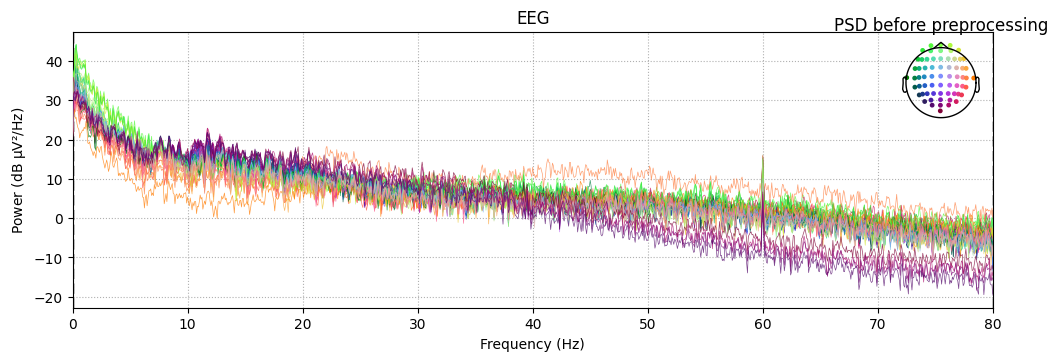

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


<Figure size 1200x500 with 0 Axes>

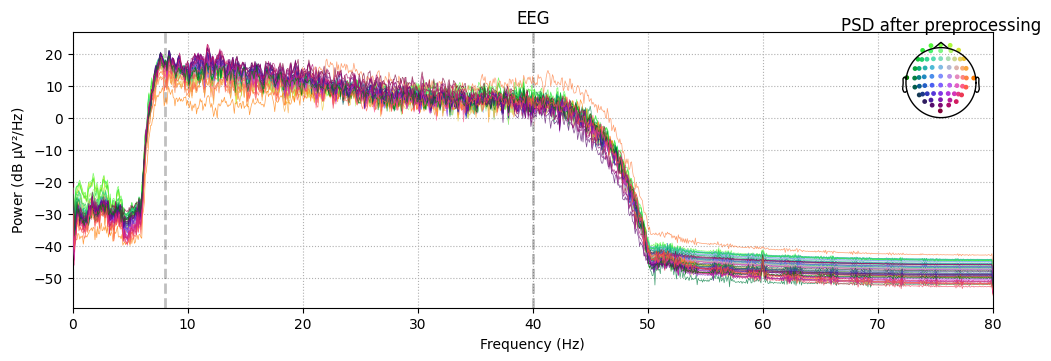

In [22]:
# Create multiple figures for better visualization
plt.figure(figsize=(12, 5))
raw_data.compute_psd(picks='all').plot()
plt.title('PSD before preprocessing')
plt.show()

plt.figure(figsize=(12, 5))
filter_data.compute_psd(picks='all').plot()
plt.title('PSD after preprocessing')
plt.show()


<Figure size 1200x800 with 0 Axes>

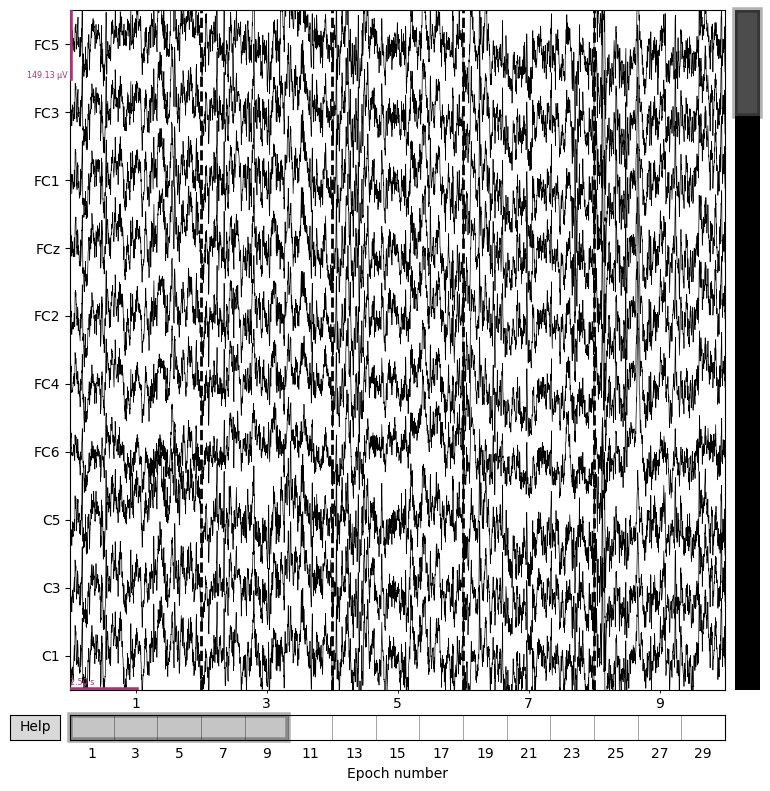

In [23]:
# Plot example epochs
plt.figure(figsize=(12, 8))
epochs.plot(n_channels=10, n_epochs=5, scalings='auto')
plt.show()


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<Figure size 1200x500 with 0 Axes>

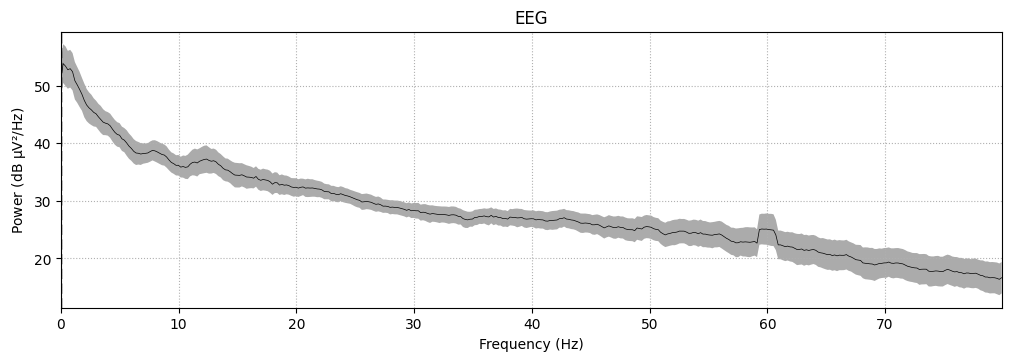

In [24]:
# Plot PSD of epochs with specific settings
plt.figure(figsize=(12, 5))
epochs.plot_psd(fmax=80, picks='all', average=True)
plt.show()


Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


<Figure size 1200x800 with 0 Axes>

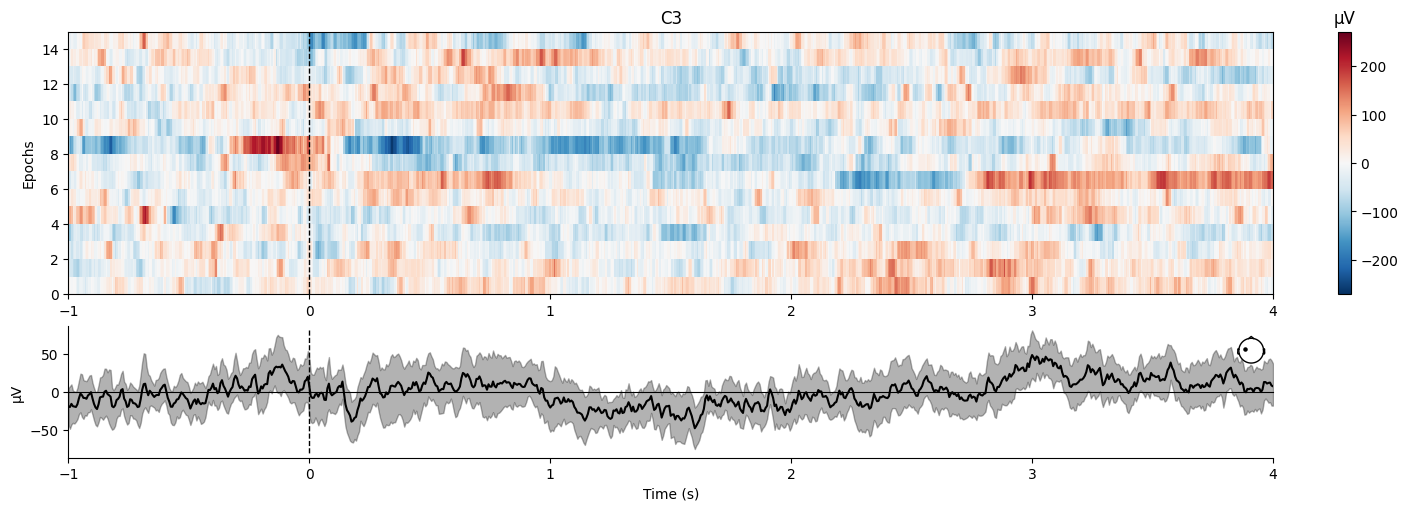

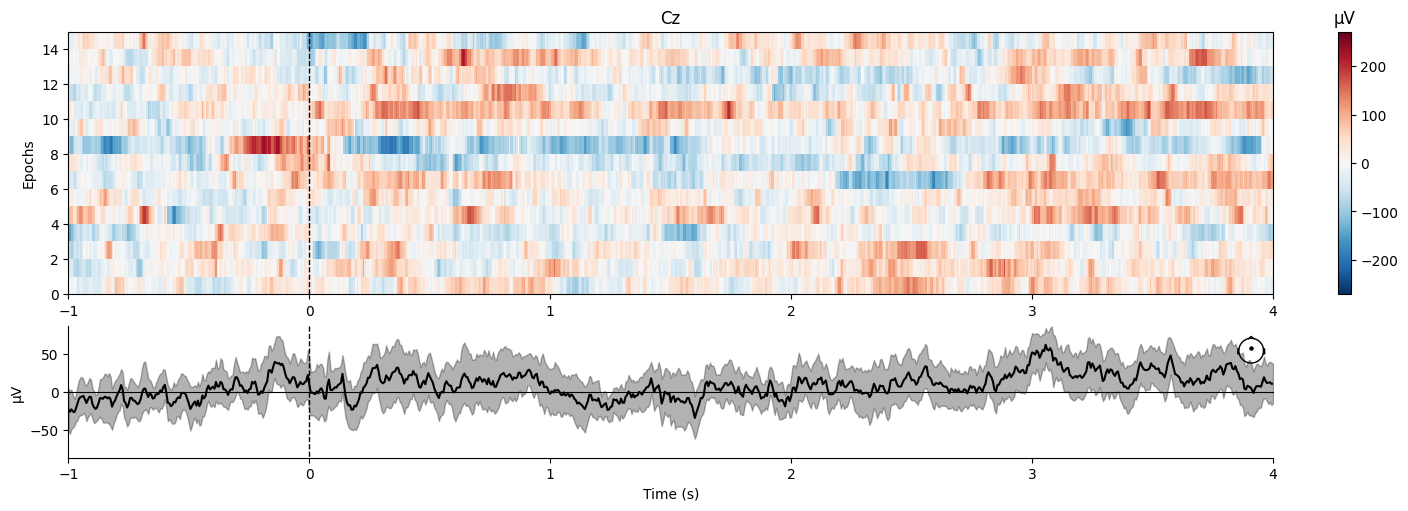

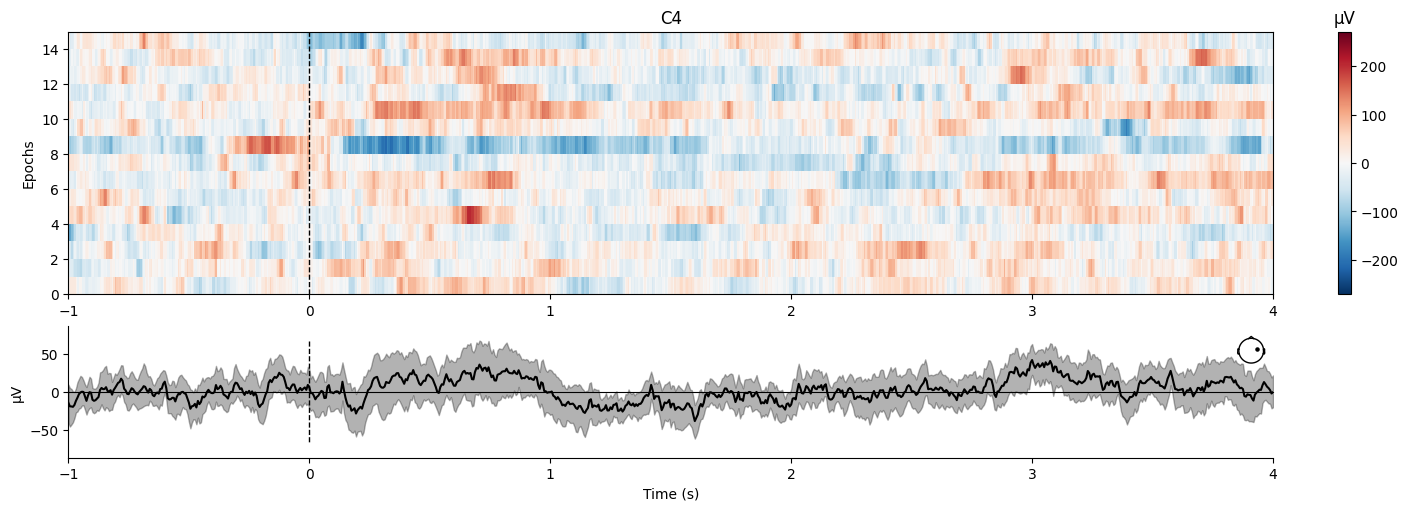

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


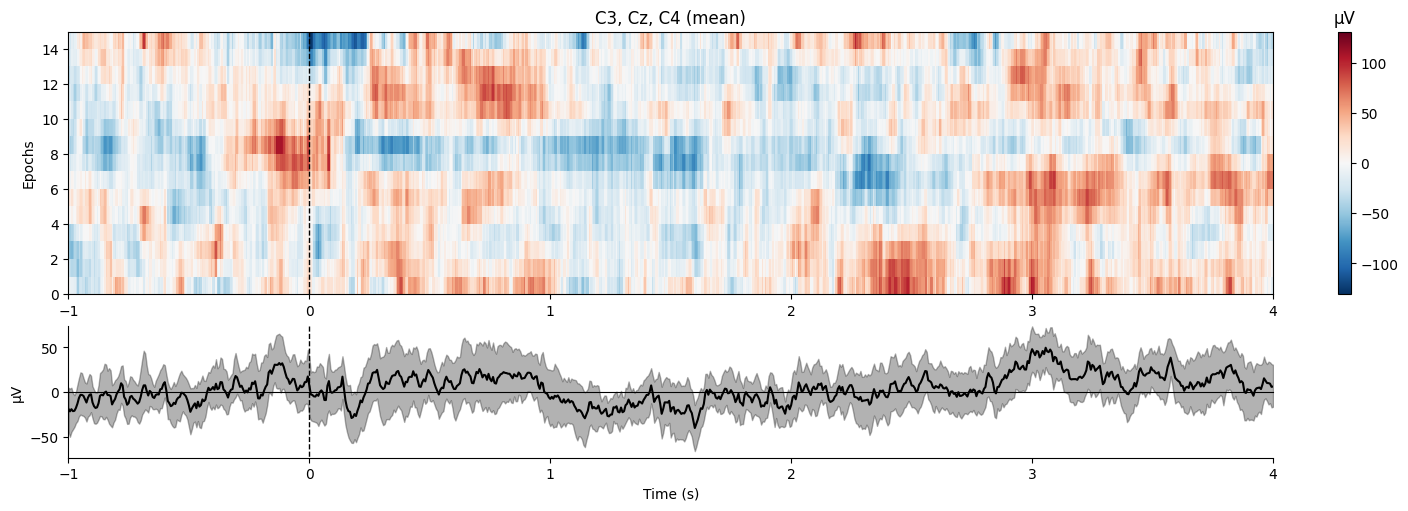

In [25]:
# Plot specific channels (motor-related channels) for all epochs 
plt.figure(figsize=(12, 8))
epochs.plot_image(picks=['C3', 'Cz', 'C4'])
epochs.plot_image(picks=['C3', 'Cz', 'C4'], combine='mean', sigma=1.0)
plt.show()


In [26]:
print("\nData Information:")
print(f"Number of epochs: {len(epochs)}")
print(f"Number of channels: {len(epochs.ch_names)}")
print(f"Sampling frequency: {epochs.info['sfreq']} Hz")
print(f"Time points per epoch: {len(epochs.times)}")



Data Information:
Number of epochs: 15
Number of channels: 64
Sampling frequency: 160.0 Hz
Time points per epoch: 801


## 8. Split dataset

In [27]:
# Extract data and labels
X = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # Labels

# Reshape for ML (flatten features)
n_epochs, n_channels, n_times = X.shape
X_flat = X.reshape(n_epochs, n_channels * n_times)

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [29]:
print(f"X shape: {X.shape}")  # (n_epochs, n_channels, n_times)
print(f"X_flat shape: {X_flat.shape}")  # (n_epochs, n_channels * n_times)
print(f"X_scaled shape: {X_scaled.shape}")  # Same as X_flat after scaling
print(f"y shape: {y.shape}")  # (n_epochs,)

print(f"Unique labels in y: {np.unique(y)}")
print(f"Mean of X_scaled: {np.mean(X_scaled):.4f}, Std: {np.std(X_scaled):.4f}")


X shape: (15, 64, 801)
X_flat shape: (15, 51264)
X_scaled shape: (15, 51264)
y shape: (15,)
Unique labels in y: [2 3]
Mean of X_scaled: -0.0000, Std: 1.0000


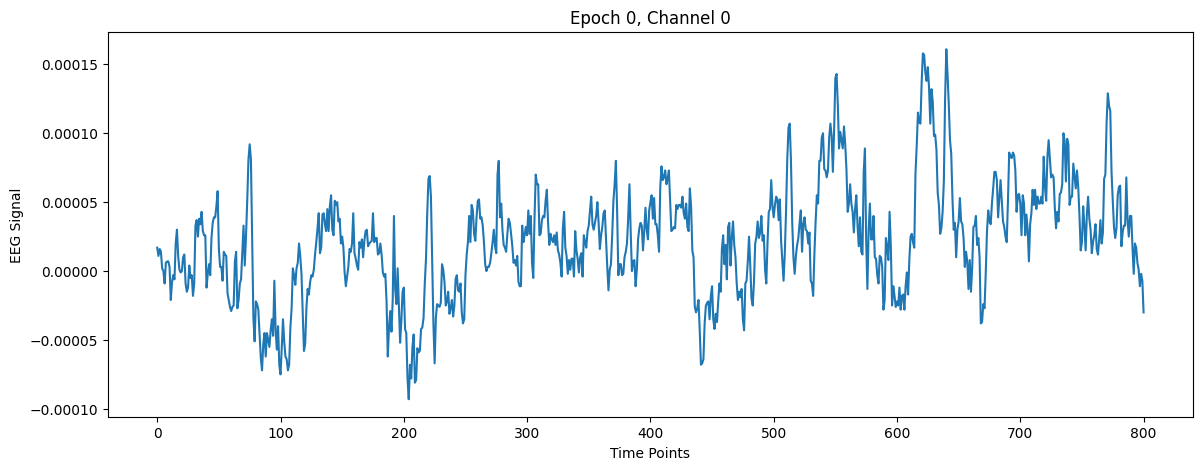

In [30]:
epoch_idx = 0    # Change this to view different epochs
channel_idx = 0  # Select a specific EEG channel

plt.plot(X[epoch_idx, channel_idx, :])  # Plot time series
plt.title(f"Epoch {epoch_idx}, Channel {channel_idx}")
plt.xlabel("Time Points")
plt.ylabel("EEG Signal")
plt.show()


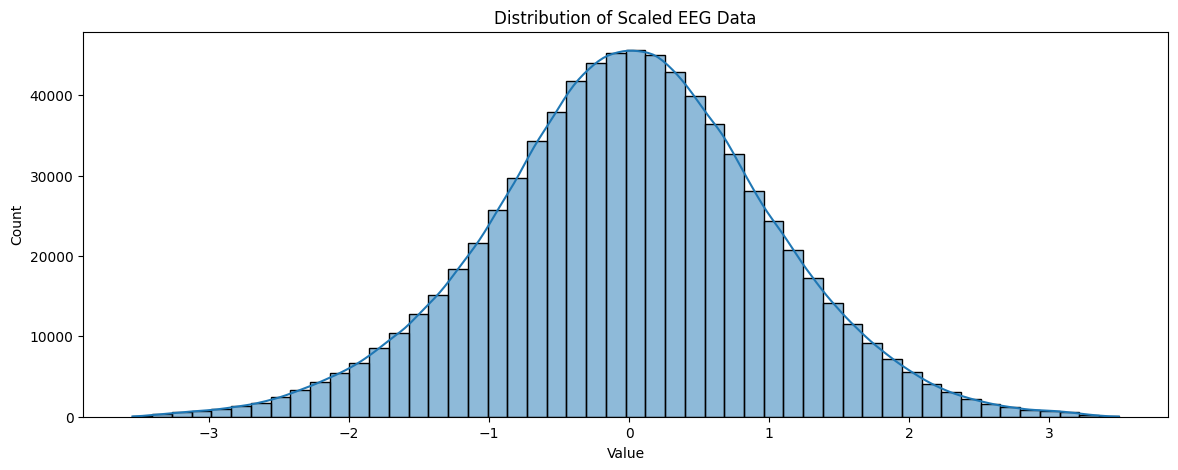

In [33]:
sns.histplot(X_scaled.flatten(), bins=50, kde=True)
plt.title("Distribution of Scaled EEG Data")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


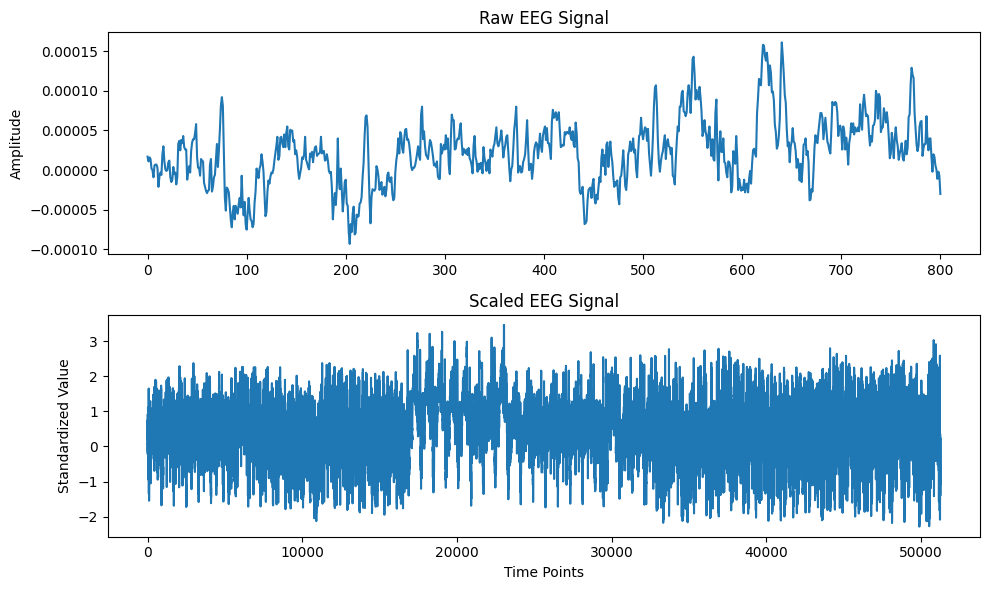

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Raw EEG signal
axs[0].plot(X[epoch_idx, channel_idx, :])
axs[0].set_title("Raw EEG Signal")
axs[0].set_ylabel("Amplitude")

# Scaled EEG signal
axs[1].plot(X_scaled[epoch_idx, :])
axs[1].set_title("Scaled EEG Signal")
axs[1].set_ylabel("Standardized Value")
axs[1].set_xlabel("Time Points")

plt.tight_layout()
plt.show()


In [35]:
print(f"X_train sample:\n{X_train[:5]}")
print(f"y_train sample:\n{y_train[:5]}")

print(f"X_test sample:\n{X_test[:5]}")
print(f"y_test sample:\n{y_test[:5]}")


X_train sample:
[[-2.34868771e-01  4.11627443e-01  7.14586299e-01 ... -8.86908120e-01
  -1.02333749e+00 -1.07664146e+00]
 [ 2.16543476e-01  3.54465495e-02  3.37185909e-01 ... -6.93833975e-01
  -5.21707695e-01 -7.07366786e-01]
 [-1.61159212e+00 -2.09869456e+00 -2.16954234e+00 ...  8.58760218e-01
  -1.85500130e-01 -2.60798759e-01]
 [ 1.09538225e-01 -9.06782400e-02 -3.71781907e-01 ... -7.10623031e-01
  -3.06706473e-01  7.50863241e-02]
 [-1.80926753e-04 -3.07393530e-01 -6.18494857e-01 ...  2.14611356e-01
   3.22922937e-01  1.16574668e-01]]
y_train sample:
[3 2 2 2 2]
X_test sample:
[[-0.09956141  0.3675386   0.59382741 ... -0.43268545 -0.45711198
  -0.74473471]
 [-0.03636628 -0.28512976 -0.74375623 ... -0.98423218 -0.55531653
  -0.01542078]
 [ 0.89747423  0.6309749   0.68526244 ... -0.86697112 -0.58308554
  -0.5517855 ]]
y_test sample:
[3 2 3]


## 9. Save preprocessed data

In [36]:
models_dir = '../models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)


In [37]:
# Save numpy arrays
np.save(os.path.join(models_dir, 'X_preprocessed.npy'), X_scaled)
np.save(os.path.join(models_dir, 'y_labels.npy'), y)


In [38]:
# Create JSON-friendly preprocessing info
preprocessing_info_json = {
    'channels': filter_data.info['ch_names'],
    'sampling_frequency': filter_data.info['sfreq'],
    'data_shape': {
        'epochs': X.shape[0],
        'channels': X.shape[1],
        'time_points': X.shape[2]
    },
    'preprocessing_parameters': {
        'filter_low': 8.0,
        'filter_high': 30.0,
        'notch_frequencies': [60],
        'scaling': 'StandardScaler'
    },
    'metadata': {
        'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'raw_data_info': str(filter_data.info)
    }
}

# Save JSON file
json_path = os.path.join(models_dir, 'preprocessing_info.json')
with open(json_path, 'w') as f:
    json.dump(preprocessing_info_json, f, indent=4)


In [39]:
# Still save pickle file for objects that can't be JSON serialized
pickle_info = {
    'scaling': scaler
}
with open(os.path.join(models_dir, 'preprocessing_objects.pkl'), 'wb') as f:
    pickle.dump(pickle_info, f)


In [40]:
print(f"Files saved in 📂{models_dir}:")
print("✓ X_preprocessed.npy")
print("✓ y_labels.npy")
print("✓ preprocessing_info.json (human readable)")
print("✓ preprocessing_objects.pkl (binary objects)")


Files saved in 📂../models:
✓ X_preprocessed.npy
✓ y_labels.npy
✓ preprocessing_info.json (human readable)
✓ preprocessing_objects.pkl (binary objects)
